### Imports

In [1]:
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport
import pandas as pd
import matplotlib.pyplot as plt

### GraphQL Client

In [2]:
transport = RequestsHTTPTransport(url='https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3')
client = Client(transport=transport, fetch_schema_from_transport=True)

### GraphQL Query

In [3]:
query = gql("""
{
  pools(first: 10, orderBy: totalValueLockedUSD, orderDirection: desc) {
    id
    token0 {
      id
      symbol
      derivedETH
    }
    token1 {
      id
      symbol
      derivedETH
    }
    feeTier
    liquidity
    sqrtPrice
    volumeUSD
    totalValueLockedUSD
  }
}
""")

### Fetch Data

In [4]:
response = client.execute(query)
print(response)

pools_data = response['pools']
df_pools = pd.DataFrame(pools_data)
print(df_pools)

{'pools': [{'id': '0x277667eb3e34f134adf870be9550e9f323d0dc24', 'token0': {'id': '0x160de4468586b6b2f8a92feb0c260fc6cfc743b1', 'symbol': 'ease.org', 'derivedETH': '833.2528589260775996459425809724284'}, 'token1': {'id': '0xea5edef1c6ed1be1bcba4617a1c5a994e9018a43', 'symbol': 'ez-cvxsteCRV', 'derivedETH': '0'}, 'feeTier': '100', 'liquidity': '313521001529099829406', 'sqrtPrice': '24804888246164192931094329', 'volumeUSD': '0', 'totalValueLockedUSD': '1110167010695.785900004139211677005'}, {'id': '0xa850478adaace4c08fc61de44d8cf3b64f359bec', 'token0': {'id': '0x12b32f10a499bf40db334efe04226cca00bf2d9b', 'symbol': 'UMIIE', 'derivedETH': '0.09982560487030552703214533918310228'}, 'token1': {'id': '0x5ed60a121159481675bad3e648ba4c89753e056f', 'symbol': 'UMIIE2', 'derivedETH': '0'}, 'feeTier': '500', 'liquidity': '1706245281880037395956227425', 'sqrtPrice': '792049440195001924670217089101', 'volumeUSD': '0', 'totalValueLockedUSD': '12887625156.60443191907094774602519'}, {'id': '0x8c0411f2ad547

### Visualize Pools

C:\Users\Arjun\AppData\Local\Temp\ipykernel_23256\1606875636.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(pool_labels, rotation=45, ha='right')
C:\Users\Arjun\AppData\Local\Temp\ipykernel_23256\1606875636.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(pool_labels, rotation=45, ha='right')


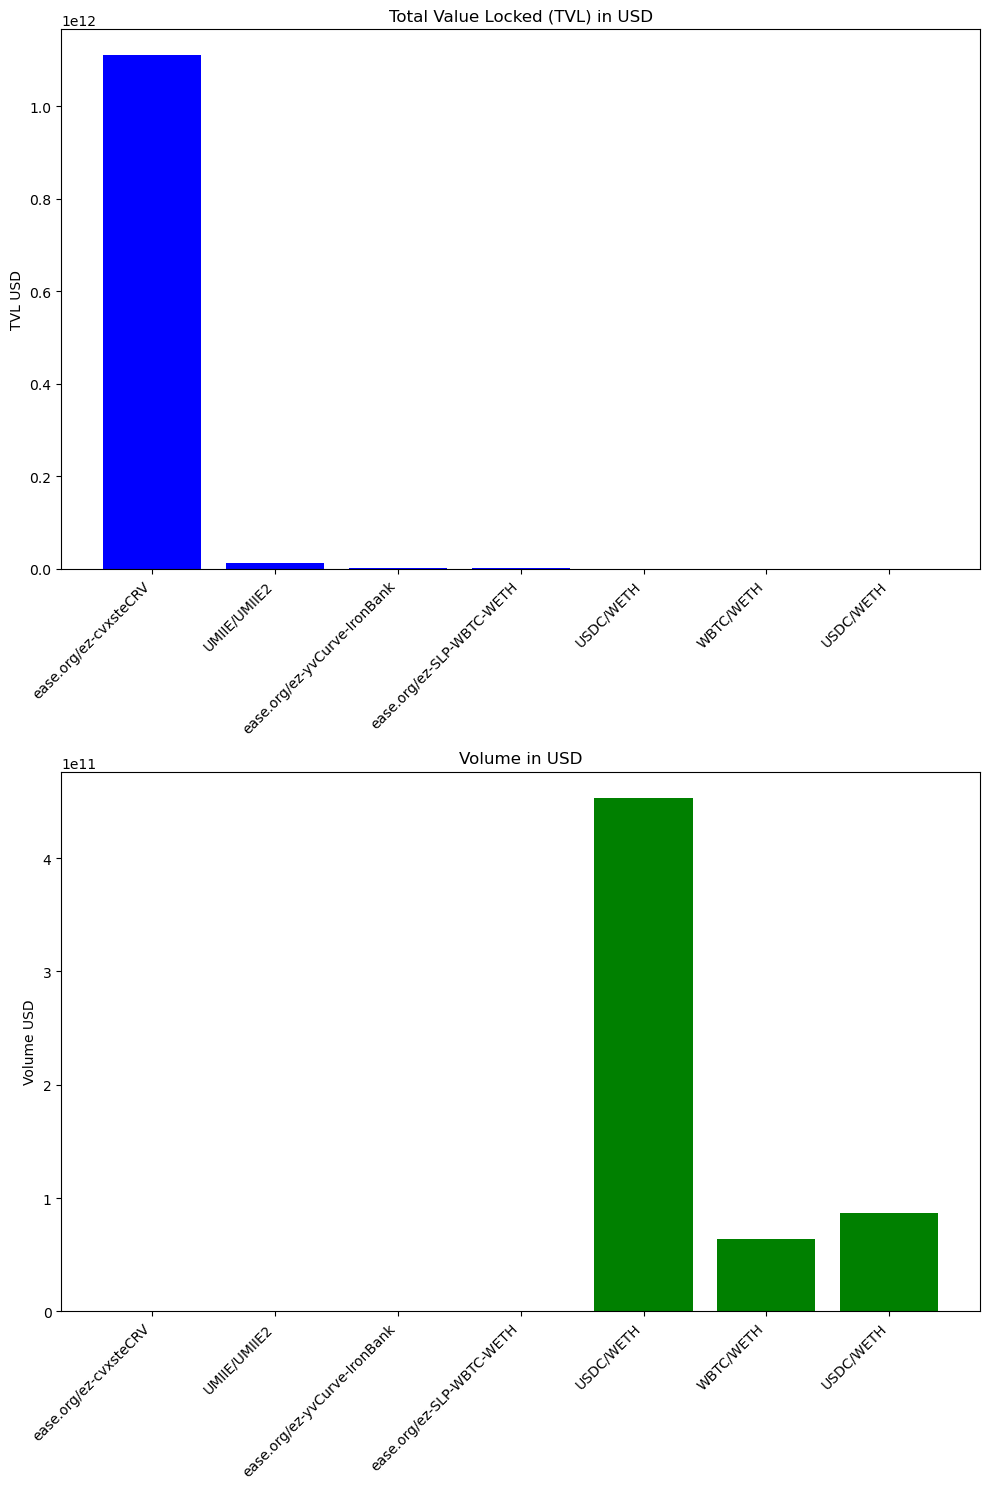

In [5]:
pool_labels = df_pools.apply(lambda row: f"{row['token0']['symbol']}/{row['token1']['symbol']}", axis=1)
tvl_usd = df_pools['totalValueLockedUSD'].astype(float)
volume_usd = df_pools['volumeUSD'].astype(float)

fig, axes = plt.subplots(2, 1, figsize=(10, 15))

axes[0].bar(pool_labels, tvl_usd, color='blue')
axes[0].set_title('Total Value Locked (TVL) in USD')
axes[0].set_ylabel('TVL USD')
axes[0].set_xticklabels(pool_labels, rotation=45, ha='right')

axes[1].bar(pool_labels, volume_usd, color='green')
axes[1].set_title('Volume in USD')
axes[1].set_ylabel('Volume USD')
axes[1].set_xticklabels(pool_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()